<h2>Importation de Librairies</h2><br/>

In [46]:

# pandas : panel data , pour une facile manipulation des données.
import pandas as pd 
# numpy : numerical python extensions , pour la manipulation de tableaux et les opérations mathématiques.
import numpy as np
# decomposition : Package pour l'analyse en composantes principales de scikit learn.
from sklearn.decomposition import PCA
# preprocessing : package pour centrer et normaliser les données avant d'effectuer l'ACP.
from sklearn.preprocessing import StandardScaler
# matplotlib : pour dessiner des graphiques, des tracés ...
import matplotlib.pyplot as plt


<h2 style="">Importation de données</h2><br/>

In [47]:

# importer les données de notre fichier dataset demo.
Nutrient_data = pd.read_csv("./nndb_flat1.csv",sep = ',')

# informations sur les données
Nutrient_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


<h2 style="text-align:center;color:#fca103">Vérification</h2><br/>

In [48]:

# La méthode Head renvoie les 5 premières lignes de données
print( Nutrient_data.head() )


     ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1   

In [49]:

# L'attribut shape renvoie les dimensions de notre Nutrient_data
print( Nutrient_data.shape )

# il y a 8618 échantillons et 45 variables, (Etat : étiquette )


(8618, 45)


<h2 style="text-align:center;color:#fca103">Prétraitement</h2><br/>

In [50]:

# séparation des variables non numériques

# l'index pour les données , inplace(true): modifie le meme objet DataFrame sans créer un autre modifié.
Nutrient_data.set_index('ID', inplace=True)

# sauvegarder les libellés pour les utiliser après
Nutrient_data_Libelles = Nutrient_data.iloc[:,:6]

# supprimer les libellés 
Nutrient_data.drop(Nutrient_data.columns[:6].values,axis = 1,inplace = True)

# La méthode Head renvoie les 5 premières lignes de données
print(Nutrient_data.head())


      Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  \
ID                                                                        
1001        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
1002        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
1003        876.0       0.28  99.48    0.00     0.00      0.0     840.0   
1004        353.0      21.40  28.74    2.34     0.50      0.0     198.0   
1005        371.0      23.24  29.68    2.79     0.51      0.0     292.0   

      VitB6_mg  VitB12_mcg  VitC_mg  ...  Folate_USRDA  Niacin_USRDA  \
ID                                   ...                               
1001     0.003        0.17      0.0  ...        0.0075      0.002625   
1002     0.003        0.13      0.0  ...        0.0075      0.002625   
1003     0.001        0.01      0.0  ...        0.0000      0.000188   
1004     0.166        1.22      0.0  ...        0.0900      0.063500   
1005     0.065        1.26      0.0  ...  

<h2 style="text-align:center;color:#fca103">Normalisation</h2><br/>

In [51]:

# normalisation et centrage des données
# moyenne =0, variance=1, les échantillons doivent être des lignes sinon vous devez les transposer (demographic_data.T)

scaled_Nutrient_data = StandardScaler().fit_transform(Nutrient_data)

# round , 2 chiffres significatifs
print (" moyenne : ", np.round(scaled_Nutrient_data.mean(), 2))
print (" variance : ", np.round(scaled_Nutrient_data.std(), 2))


 moyenne :  0.0
 variance :  1.0


<h2 style="text-align:center;color:#fca103">ACP</h2><br/>

In [52]:

# instanciation d'un objet ACP à entraîner avec notre jeu de données , nombre de composantes à garder : 10
pca_var = PCA(n_components=10)
pca=pca_var.fit_transform(scaled_Nutrient_data)


In [53]:

# explained_variance_ratio_ : les valeurs propres des composantes principale. (valeurs propres)
print (pca_var.explained_variance_)

# get_covariance() : calculer les covariances à partir de la matrice de données.
print ( pca_var.get_covariance() )

# explained_variance_ratio_ : array avec les proportions de variance associées aux axes. (combien il porte d'informations)

# les 10 premiers vecteurs propres représentent 81% de l’information disponible , ils seront conservés
print ( pca_var.explained_variance_ratio_[:10].sum() )




[9.86980843 4.11519522 3.42762179 2.93274947 2.38162189 2.09360807
 1.74277364 1.62792563 1.32638865 1.32186393]
[[1.08275145 0.06513801 0.670262   ... 0.19889696 0.06170754 0.13217218]
 [0.06513801 0.88722107 0.11063304 ... 0.43199322 0.40248918 0.46429053]
 [0.670262   0.11063304 0.97817849 ... 0.10825448 0.02667904 0.02976545]
 ...
 [0.19889696 0.43199322 0.10825448 ... 1.02961156 0.24272404 0.29026684]
 [0.06170754 0.40248918 0.02667904 ... 0.24272404 1.11535328 0.17897878]
 [0.13217218 0.46429053 0.02976545 ... 0.29026684 0.17897878 1.03449059]]
0.8114731106847417


<h2 style="text-align:center;color:#fca103">Graphiques des valeurs propres</h2><br/>

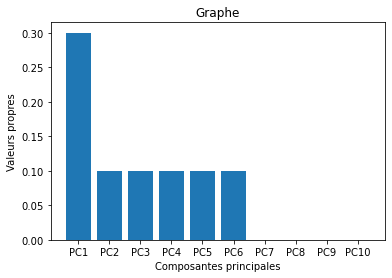

In [54]:
# les valeurs propres
per_var = np.round(pca_var.explained_variance_ratio_,decimals=1)

# création des étiquettes pour les composantes principales
labels = ['PC' + str(x) for x in range( 1 , len(per_var) +1 ) ]

# création du graphe
plt.bar( x=range( 1,len(per_var)+1 ), height=per_var, tick_label=labels)
plt.ylabel('Valeurs propres')
plt.xlabel('Composantes principales')
plt.title('Graphe')
plt.show()




<h2 style="text-align:center;color:#fca103">Étiquetage et renommage des composantes</h2><br/>


In [55]:

pca = pd.DataFrame(pca[:, :10], index=Nutrient_data.index)

# ajouter les libellés qu'on a supprimé avant 
pca = pca.join(Nutrient_data_Libelle)
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5',5:'c6',6:'c7',7:'c8',8:'c9',9:'c10'}, inplace=True)


In [56]:

# on voit que les 10 vecteurs sont orthogonaux
np.round(pca.corr(), 10)


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
c1,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
c2,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
c3,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
c4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
c5,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0
c6,0.0,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0
c7,0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0
c8,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0
c9,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
c10,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0


<h2 style="text-align:center;color:#fca103">Interprétation des composantes</h2><br/>

<h5 style="text-align:left;color:#fca103">Composante une</h5><br/>


In [57]:
# copier les 10 composantes dans la variable vects
vects = pca_var.components_[:10]

# pd.Series : Tableau unidimensionnel avec des étiquettes d'axe
one = pd.Series(vects[0], index=Nutrient_data.columns)
one.sort_values(ascending=False)

# ces valeurs representent la contribution des variables initiale à la construction des composantes principales

Riboflavin_mg       0.262413
Riboflavin_USRDA    0.262413
Niacin_mg           0.258820
Niacin_USRDA        0.258820
VitB6_USRDA         0.240479
VitB6_mg            0.240479
Folate_USRDA        0.212663
Folate_mcg          0.212663
Iron_mg             0.207546
Thiamin_mg          0.204840
Thiamin_USRDA       0.204840
Zinc_USRDA          0.187761
Zinc_mg             0.187761
Magnesium_USRDA     0.166961
Magnesium_mg        0.166961
Phosphorus_mg       0.147768
Phosphorus_USRDA    0.147768
VitB12_mcg          0.147756
VitB12_USRDA        0.147756
Copper_USRDA        0.140444
Copper_mcg          0.140444
Calcium_mg          0.118434
Calcium_USRDA       0.118434
Fiber_g             0.112393
Protein_g           0.110906
VitA_mcg            0.109097
VitA_USRDA          0.109097
VitE_mg             0.099086
VitE_USRDA          0.099086
Carb_g              0.098943
Energy_kcal         0.093260
Selenium_mcg        0.075559
Selenium_USRDA      0.075559
VitC_mg             0.070302
VitC_USRDA    

<h5 style="text-align:left;color:#fca103">Composante deux</h5><br/>

In [43]:
two = pd.Series(vects[1], index=Nutrient_data.columns)
two.sort_values(ascending=False)

VitB12_mcg          0.359418
VitB12_USRDA        0.359418
VitA_USRDA          0.338184
VitA_mcg            0.338184
Copper_mcg          0.306495
Copper_USRDA        0.306495
Selenium_mcg        0.134056
Selenium_USRDA      0.134056
Manganese_mg        0.125264
Protein_g           0.121809
Zinc_mg             0.048167
Zinc_USRDA          0.048167
Riboflavin_USRDA    0.013582
Riboflavin_mg       0.013582
Phosphorus_mg       0.001314
Phosphorus_USRDA    0.001314
Fat_g              -0.017774
VitC_mg            -0.051779
VitC_USRDA         -0.051779
Niacin_mg          -0.058528
Niacin_USRDA       -0.058528
VitE_USRDA         -0.077774
VitE_mg            -0.077774
VitB6_mg           -0.083041
VitB6_USRDA        -0.083041
Magnesium_mg       -0.089100
Magnesium_USRDA    -0.089100
Iron_mg            -0.100659
Calcium_mg         -0.105688
Calcium_USRDA      -0.105688
Energy_kcal        -0.107177
Folate_mcg         -0.131009
Folate_USRDA       -0.131009
Sugar_g            -0.136636
Thiamin_mg    

<h5 style="text-align:left;color:#fca103">Composante trois</h5><br/>

In [44]:
three = pd.Series(vects[2], index=Nutrient_data.columns)
three.sort_values(ascending=False)

Phosphorus_mg       0.364689
Phosphorus_USRDA    0.364689
Calcium_USRDA       0.299012
Calcium_mg          0.299012
Magnesium_mg        0.283292
Magnesium_USRDA     0.283292
Protein_g           0.149077
Energy_kcal         0.145460
Fiber_g             0.138130
Fat_g               0.136412
Selenium_mcg        0.120335
Selenium_USRDA      0.120335
Copper_mcg          0.102700
Copper_USRDA        0.102700
VitE_USRDA          0.048507
VitE_mg             0.048507
Manganese_mg        0.035244
Zinc_USRDA          0.034207
Zinc_mg             0.034207
Iron_mg             0.014576
Carb_g              0.009077
Sugar_g            -0.037851
VitA_USRDA         -0.063989
VitA_mcg           -0.063989
VitB12_USRDA       -0.066175
VitB12_mcg         -0.066175
VitC_mg            -0.086168
VitC_USRDA         -0.086168
VitB6_USRDA        -0.123040
VitB6_mg           -0.123040
Thiamin_USRDA      -0.144481
Thiamin_mg         -0.144481
Niacin_mg          -0.146043
Niacin_USRDA       -0.146043
Riboflavin_USR